In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-02/Fish.csv")
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,["Height","Width"]].values,df.loc[:,"Weight"].values,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)
y_test =y_test.reshape(-1,1)

**Câu 1 :**

*   BGD : " Weight - Heigh " in data Fish



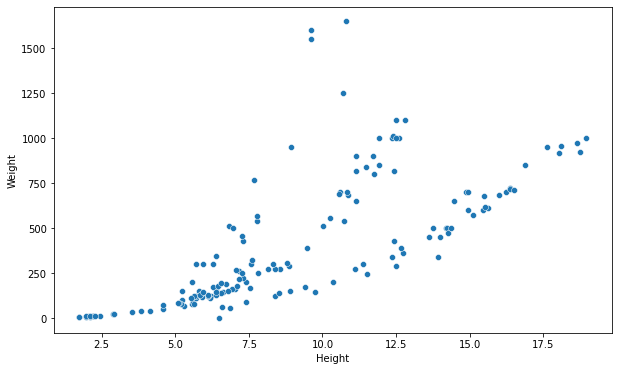

In [4]:
X_0 = X_train[:,0].reshape(-1,1)
y = y_train.reshape(-1,1)
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x="Height",y="Weight",data=df, ax = ax)

In [5]:
#  Tạo learning rate
np.random.seed(1)
lr = 0.01
# Tạo W
W = np.asarray([[-150],[59]])
# Thêm cột một cho bias
X = np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis = 1)
print("Shape of X is :", X.shape,"\n")

Shape of X is : (127, 2) 



In [6]:
# Gradient Descent
arr_loss = []
for i in range(10000):
  prediction = np.matmul(X,W)
  loss = prediction - y
  gradient = np.matmul(X.T,loss)
  W = W -lr*(1/X.shape[0])*gradient
  loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
  arr_loss.append(loss)
  if i % 1000 ==0 :
    print("Loss at iter {} : {}".format(i,loss))

loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Final loss :",loss)
print("Final W :",W)

Loss at iter 0 : 30839.658035131746
Loss at iter 1000 : 30805.90584091927
Loss at iter 2000 : 30804.92665693285
Loss at iter 3000 : 30804.898222301206
Loss at iter 4000 : 30804.897396584813
Loss at iter 5000 : 30804.897372606738
Loss at iter 6000 : 30804.897371910443
Loss at iter 7000 : 30804.897371890223
Loss at iter 8000 : 30804.897371889623
Loss at iter 9000 : 30804.897371889612
Final loss : 30804.897371889612
Final W : [[-130.02406028]
 [  59.42895271]]


In [7]:
X_1 = X_test[:,0].reshape(-1,1)
X_new = np.concatenate([np.ones([X_1.shape[0],1]),X_1],axis = 1)

loss_y = np.mean(np.square(np.matmul(X_new,W)-y_test))
print(loss_y*(0.5))

28228.215191712316


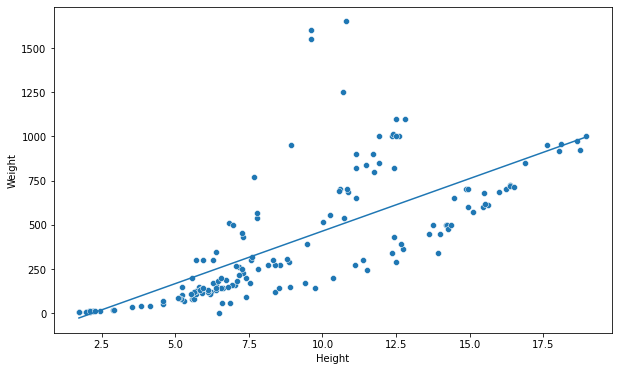

In [8]:
Z = df[["Height"]].to_numpy()
Z_1 = np.concatenate([np.ones([Z.shape[0],1]),Z],axis = 1)

fig, ax = plt.subplots(figsize = (10, 6))
fig1=sns.scatterplot(x="Height",y="Weight",data=df,ax=ax)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(Z_1,W).reshape(-1,),ax=ax)

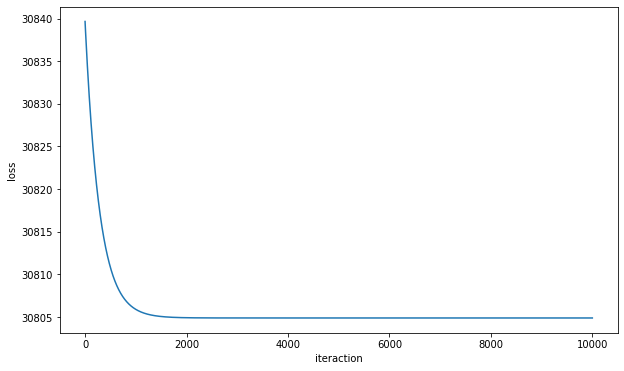

In [9]:
fig,ax = plt.subplots(figsize = (10,6))
plt.plot(arr_loss)
ax.set_ylabel("loss")
ax.set_xlabel("iteraction")
plt.show()



*   SGD : " Weight - Heigh " in data Fish








In [15]:
# Gradient Descent
arr_loss = []
for i in range(10000):
  rd_id = np.random.permutation(X.shape[0])
  print(rd_id.shape)
  for j in rd_id:
    X_1 = X[j,:].reshape(1,-1)
    error  =np.matmul(X_1,W)-y[j,:].reshape(1,-1)
    W = W - lr*np.matmul(X_1.T,error)
  loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
  arr_loss.append(loss)
  if i % 1000 == 0:
    print("Loss at iter {} : {}".format(i,loss))
    
loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Loss final :",loss)
print("W final :",W)

(127,)
Loss at iter 0 : 34836.396902230765
Loss final : 34836.396902230765
W final : [[-108.53243445]
 [  48.56445932]]


In [16]:
X.shape

(127, 2)

In [ ]:
loss_y = np.mean(np.square(np.matmul(X_new,W)-y_test))
print(loss_y*(0.5))

34726.37933867959


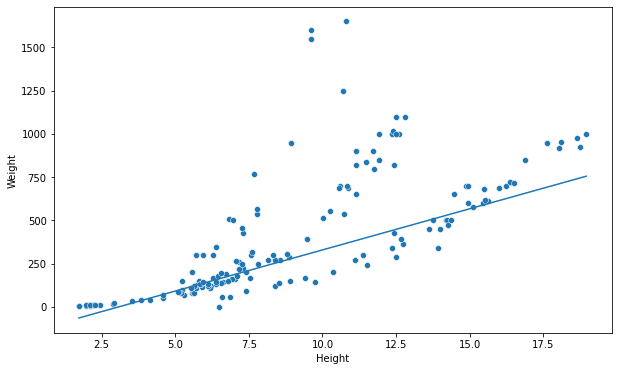

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
fig1=sns.scatterplot(x="Height",y="Weight",data=df,ax=ax)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(Z_1,W).reshape(-1,),ax=ax)

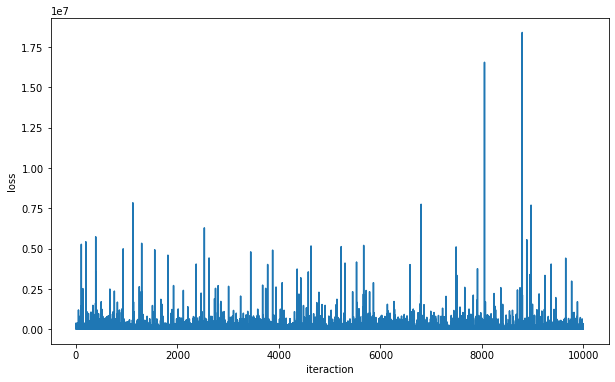

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
plt.plot(arr_loss)
ax.set_ylabel("loss")
ax.set_xlabel("iteraction")
plt.show()

*   miniGD : " Weight - Heigh " in data Fish


In [ ]:
# Gradient Descent
first_X = X.copy()
first_y = y.copy()
array_loss = []
for i in range(10000):
  indices =np.random.permutation(X.shape[0])
  first_X = first_X[indices]
  first_y = first_y[indices]
  temp = 32
  z = 0
  for j in range(0,X.shape[0],32):
    z+=1
    X_1 = first_X[j:temp,:]
    prediction=np.matmul(X_1,W)
    loss=prediction-first_y[j:temp,:]
    gradient=np.matmul(X_1.T,loss)
    W=W-lr*(1/X_1.shape[0])*gradient

    temp=temp+ 32 if X.shape[0]-temp>=32 else X.shape[0]
    loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
    array_loss.append(loss)
    if i % 1000 == 0:
        print(z)
        print("Loss at iter {}: {}".format(i, loss))

loss=(0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Loss final: ", loss)
print("W final : ", W)

1
Loss at iter 0: 30834.7416779022
2
Loss at iter 0: 31249.615859722526
3
Loss at iter 0: 32445.13407387925
4
Loss at iter 0: 32168.833691822623
1
Loss at iter 1000: 31293.14933412218
2
Loss at iter 1000: 32352.984335036133
3
Loss at iter 1000: 30910.568901192906
4
Loss at iter 1000: 37041.61881078757
1
Loss at iter 2000: 32584.97132965531
2
Loss at iter 2000: 35070.95305360964
3
Loss at iter 2000: 30939.455466366155
4
Loss at iter 2000: 30871.18726927589
1
Loss at iter 3000: 31824.754095869095
2
Loss at iter 3000: 30804.97534394866
3
Loss at iter 3000: 31037.426638765526
4
Loss at iter 3000: 31013.354150426057
1
Loss at iter 4000: 31433.347188938413
2
Loss at iter 4000: 32735.633907470525
3
Loss at iter 4000: 31110.102220683344
4
Loss at iter 4000: 30838.54935407623
1
Loss at iter 5000: 31105.06621987398
2
Loss at iter 5000: 30806.740558033922
3
Loss at iter 5000: 31899.456415587436
4
Loss at iter 5000: 31398.76837267095
1
Loss at iter 6000: 30822.189399035327
2
Loss at iter 6000: 314

In [ ]:
loss_y = np.mean(np.square(np.matmul(X_new,W)-y_test))
print(loss_y*(0.5))

28987.203665223227


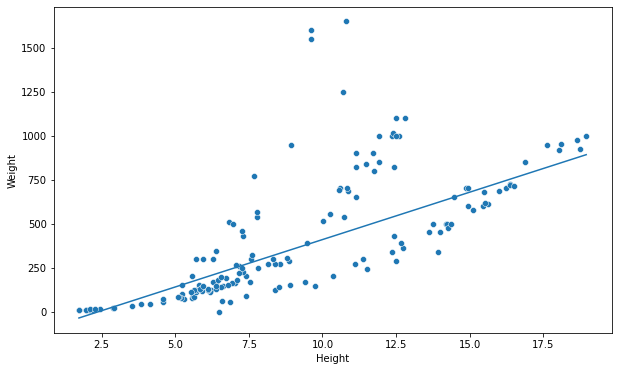

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
fig1=sns.scatterplot(x="Height",y="Weight",data=df,ax=ax)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(Z_1,W).reshape(-1,),ax=ax)

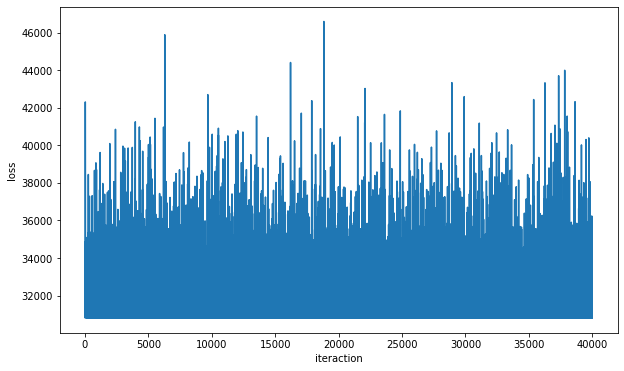

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
plt.plot(array_loss)
ax.set_ylabel("loss")
ax.set_xlabel("iteraction")
plt.show()

**Câu 2 :**


In [ ]:
X_0 = X_train
y = y_train.reshape(-1,1)

#  Tạo learning rate
np.random.seed(1)
lr = 0.01
# Tạo W
W = np.asarray([[-100],[2],[200]])
# Thêm cột một cho bias
X = np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis = 1)
print("Shape of X is :", X.shape,"\n")

Shape of X is : (127, 3) 



*   BGD : " Weight with Height and Width " in data fish

In [ ]:
# Gradient Descent
arr_loss = []
T = []
for i in range(10000):
  prediction = np.matmul(X,W)
  loss = prediction - y
  gradient = np.matmul(X.T,loss)
  W = W -lr*(1/X.shape[0])*gradient
  loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
  arr_loss.append(loss)
  T.append(i)
  if i % 1000 ==0 :
    print("Loss at iter {} : {}".format(i,loss))
    
loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Final loss :",loss)
print("Final W :",W)
W_BGD = W

Loss at iter 0 : 24943.115631810328
Loss at iter 1000 : 12676.69102294514
Loss at iter 2000 : 12232.16062787974
Loss at iter 3000 : 12194.950193331375
Loss at iter 4000 : 12191.835408707706
Loss at iter 5000 : 12191.57467852894
Loss at iter 6000 : 12191.552853512338
Loss at iter 7000 : 12191.55102659935
Loss at iter 8000 : 12191.550873673421
Loss at iter 9000 : 12191.550860872401
Final loss : 12191.550859801106
Final W : [[-415.47996914]
 [   1.63051765]
 [ 181.33388511]]


*   SGD : " Weight with Height and Width " in data fish

In [ ]:
# Gradient Descent
for i in range(10000):
  rd_id = np.random.permutation(X.shape[0])
  for j in rd_id:
    X_1 = X[j,:].reshape(1,-1)
    error  =np.matmul(X_1,W)-y[j,:].reshape(1,-1)
    W = W - lr*np.matmul(X_1.T,error)
  loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
  if i % 1000 == 0:
    print("Loss at iter {} : {}".format(i,loss))
loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Loss final :",loss)
print("W final :",W)
W_SGD = W

Loss at iter 0 : 129315.47496237695
Loss at iter 1000 : 70025.34647317372
Loss at iter 2000 : 117754.57186349927
Loss at iter 3000 : 29880.511055942803
Loss at iter 4000 : 37464.993983617256
Loss at iter 5000 : 32452.213708067993
Loss at iter 6000 : 70483.43738412281
Loss at iter 7000 : 15110.191783670487
Loss at iter 8000 : 18072.89233660632
Loss at iter 9000 : 369699.3036117561
Loss final : 20863.34125818228
W final : [[-427.12934826]
 [  -0.79594773]
 [ 161.04162052]]


*   miniGD : " Weight with Height and Width " in data fish

In [ ]:
# Gradient Descent
first_X = X.copy()
first_y = y.copy()
for i in range(10000):
  indices =np.random.permutation(X.shape[0])
  first_X = first_X[indices]
  first_y = first_y[indices]
  temp = 32
  z = 0
  for j in range(0,X.shape[0],32):
    z+=1
    X_1 = first_X[j:temp,:]
    prediction=np.matmul(X_1,W)
    loss=prediction-first_y[j:temp,:]
    gradient=np.matmul(X_1.T,loss)
    W=W-lr*(1/X_1.shape[0])*gradient

    temp=temp+ 32 if X.shape[0]-temp>=32 else X.shape[0]
    loss = (0.5)*np.mean(np.square(np.matmul(X,W)-y))
    if i % 1000 == 0:
      print(z)
      print("Loss at iter {}: {}".format(i, loss))

loss=(0.5)*np.mean(np.square(np.matmul(X,W)-y))
print("Loss final: ", loss)
print("W final : ", W)
W_miniGD = W

1
Loss at iter 0: 12609.577901844636
2
Loss at iter 0: 13799.68185342919
3
Loss at iter 0: 12747.233526035025
4
Loss at iter 0: 12417.602455581688
1
Loss at iter 1000: 13631.299281309022
2
Loss at iter 1000: 12237.05101515207
3
Loss at iter 1000: 12248.906047005445
4
Loss at iter 1000: 16685.7262191404
1
Loss at iter 2000: 12347.604136763455
2
Loss at iter 2000: 12527.03431104414
3
Loss at iter 2000: 13749.0025264678
4
Loss at iter 2000: 12254.992681216543
1
Loss at iter 3000: 13322.872730299001
2
Loss at iter 3000: 12195.859793321955
3
Loss at iter 3000: 12362.844402524188
4
Loss at iter 3000: 12813.840470127632
1
Loss at iter 4000: 12960.801586456944
2
Loss at iter 4000: 13017.446799527866
3
Loss at iter 4000: 12325.145577975103
4
Loss at iter 4000: 12474.036574780943
1
Loss at iter 5000: 13131.246811984893
2
Loss at iter 5000: 12223.333484977056
3
Loss at iter 5000: 12271.563414470738
4
Loss at iter 5000: 12428.070497062248
1
Loss at iter 6000: 12251.757617846159
2
Loss at iter 6000

**Câu 3 :**

In [ ]:
Xtest_new = np.concatenate([np.ones([X_test.shape[0],1]),X_test],axis = 1)

loss_y = np.mean(np.square(np.matmul(Xtest_new,W_BGD)-y_test))
print("Loss trên tập test bằng thuật toán BGD :",loss_y*(0.5))

Loss trên tập test bằng thuật toán BGD : 19231.501075314485


In [ ]:
loss_y = np.mean(np.square(np.matmul(Xtest_new,W_SGD)-y_test))
print("Loss trên tập test bằng thuật toán SGD :",loss_y*(0.5))

Loss trên tập test bằng thuật toán SGD : 27391.024018595825


In [ ]:
loss_y = np.mean(np.square(np.matmul(Xtest_new,W_miniGD)-y_test))
print("Loss trên tập test bằng thuật toán miniGD :",loss_y*(0.5))

Loss trên tập test bằng thuật toán miniGD : 20791.744639688903


Với cùng số vòng lặp , "loss" trên tập "X_test" với thuật toán BGD là nhỏ nhất .

Do đó Weight tốt nhất cho mô hình trên là :

In [ ]:
print("W = ",W_BGD)

W =  [[-415.47996914]
 [   1.63051765]
 [ 181.33388511]]
